In [1]:
#Dataset: https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy.io.wavfile as sci_wav  # Open wav files
import os  

ROOT_DIR = 'C:/data/cats_dog/'
X_path = os.listdir(ROOT_DIR + 'all/')
X_path

['cat_1.wav',
 'cat_10.wav',
 'cat_100.wav',
 'cat_101.wav',
 'cat_102.wav',
 'cat_103.wav',
 'cat_105.wav',
 'cat_106.wav',
 'cat_107.wav',
 'cat_108.wav',
 'cat_109.wav',
 'cat_11.wav',
 'cat_110.wav',
 'cat_112.wav',
 'cat_113.wav',
 'cat_114.wav',
 'cat_115.wav',
 'cat_116.wav',
 'cat_117.wav',
 'cat_118.wav',
 'cat_119.wav',
 'cat_12.wav',
 'cat_120.wav',
 'cat_121.wav',
 'cat_122.wav',
 'cat_123.wav',
 'cat_124.wav',
 'cat_125.wav',
 'cat_126.wav',
 'cat_127.wav',
 'cat_128.wav',
 'cat_129.wav',
 'cat_13.wav',
 'cat_130.wav',
 'cat_131.wav',
 'cat_132.wav',
 'cat_133.wav',
 'cat_134.wav',
 'cat_135.wav',
 'cat_136.wav',
 'cat_137.wav',
 'cat_138.wav',
 'cat_139.wav',
 'cat_14.wav',
 'cat_140.wav',
 'cat_141.wav',
 'cat_142.wav',
 'cat_143.wav',
 'cat_144.wav',
 'cat_146.wav',
 'cat_147.wav',
 'cat_148.wav',
 'cat_149.wav',
 'cat_15.wav',
 'cat_150.wav',
 'cat_151.wav',
 'cat_152.wav',
 'cat_153.wav',
 'cat_154.wav',
 'cat_155.wav',
 'cat_156.wav',
 'cat_157.wav',
 'cat_158.wav',


In [2]:
y = [0 if 'cat' in f else 1 for f in X_path]
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [3]:
#Data 불균형
print(y.count(0))
print(y.count(1))

164
108


In [4]:
X = pd.DataFrame(data=X_path, columns=['filename'])
y = pd.DataFrame(data=y, columns=['label'])

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['filename'] )
y_samp = pd.DataFrame(data=y_sample,columns=['label'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2.head()

,filename,label
0,cat_83.wav,0
1,cat_31.wav,0
2,cat_47.wav,0
3,cat_106.wav,0
4,cat_36.wav,0


In [6]:
y_sample.value_counts()

label
0        108
1        108
dtype: int64

In [7]:
#train_test_split(전체파일명list, 0/1분류list, 검증비율)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.10)

In [8]:
y_train.value_counts()

label
0        97
1        97
dtype: int64

In [9]:
X_train

,filename
29,cat_65.wav
65,cat_87.wav
91,cat_149.wav
164,dog_barking_52.wav
73,cat_7.wav
...,...
124,dog_barking_15.wav
141,dog_barking_31.wav
192,dog_barking_78.wav
179,dog_barking_66.wav


In [10]:
y_train.shape

(194, 1)

In [11]:
df_train = pd.concat([X_train,y_train], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.head()

,filename,label
0,cat_65.wav,0
1,cat_87.wav,0
2,cat_149.wav,0
3,dog_barking_52.wav,1
4,cat_7.wav,0


In [12]:
df_test = pd.concat([X_test,y_test], axis=1)
df_test = df_test.reset_index(drop=True)
df_test.head()

,filename,label
0,dog_barking_41.wav,1
1,dog_barking_51.wav,1
2,cat_28.wav,0
3,dog_barking_0.wav,1
4,dog_barking_36.wav,1


In [13]:
df_train.to_csv(ROOT_DIR+'/train_catdog.csv', index=False)
df_test.to_csv(ROOT_DIR+'/test_catdog.csv', index=False)

In [14]:
def read_wav_files(wav_files):
    if not isinstance(wav_files, list):
        wav_files = [wav_files]
    return [sci_wav.read(ROOT_DIR +'all/'+ f)[1] for f in wav_files]

print(read_wav_files('cat_1.wav'))
print(read_wav_files(['cat_1.wav', 'cat_2.wav']))

[array([ 124,  107,    7, ..., -545, -494, -529], dtype=int16)]
[array([ 124,  107,    7, ..., -545, -494, -529], dtype=int16), array([-1028, -1039, -1064, ...,     6,    38,     2], dtype=int16)]


In [15]:
xlist1 = X_train['filename'].values.tolist()
xlist2 = X_test['filename'].values.tolist()

In [16]:
xlist1

['cat_65.wav',
 'cat_87.wav',
 'cat_149.wav',
 'dog_barking_52.wav',
 'cat_7.wav',
 'cat_34.wav',
 'cat_152.wav',
 'cat_23.wav',
 'cat_31.wav',
 'dog_barking_45.wav',
 'dog_barking_48.wav',
 'dog_barking_11.wav',
 'cat_148.wav',
 'cat_113.wav',
 'dog_barking_24.wav',
 'dog_barking_29.wav',
 'cat_84.wav',
 'dog_barking_61.wav',
 'dog_barking_85.wav',
 'dog_barking_5.wav',
 'dog_barking_4.wav',
 'cat_166.wav',
 'dog_barking_38.wav',
 'cat_147.wav',
 'dog_barking_22.wav',
 'dog_barking_9.wav',
 'dog_barking_77.wav',
 'cat_18.wav',
 'dog_barking_59.wav',
 'dog_barking_62.wav',
 'cat_73.wav',
 'cat_39.wav',
 'dog_barking_64.wav',
 'cat_100.wav',
 'dog_barking_28.wav',
 'dog_barking_86.wav',
 'cat_106.wav',
 'dog_barking_93.wav',
 'dog_barking_112.wav',
 'cat_68.wav',
 'dog_barking_60.wav',
 'dog_barking_46.wav',
 'cat_47.wav',
 'cat_83.wav',
 'cat_115.wav',
 'cat_74.wav',
 'dog_barking_106.wav',
 'cat_97.wav',
 'cat_41.wav',
 'cat_98.wav',
 'cat_151.wav',
 'cat_101.wav',
 'dog_barking_98.wa

In [17]:
xlist2

['dog_barking_41.wav',
 'dog_barking_51.wav',
 'cat_28.wav',
 'dog_barking_0.wav',
 'dog_barking_36.wav',
 'cat_88.wav',
 'dog_barking_65.wav',
 'dog_barking_34.wav',
 'dog_barking_13.wav',
 'dog_barking_35.wav',
 'dog_barking_73.wav',
 'cat_130.wav',
 'cat_91.wav',
 'cat_61.wav',
 'cat_2.wav',
 'cat_62.wav',
 'cat_163.wav',
 'cat_52.wav',
 'cat_26.wav',
 'dog_barking_8.wav',
 'cat_144.wav',
 'dog_barking_33.wav']

In [18]:
X_train, X_test = map(read_wav_files, [xlist1, xlist2])
X_train

[array([102,  93, 212, ..., 246, 188,  85], dtype=int16),
 array([ 365, -183,   80, ...,  295,  324,  499], dtype=int16),
 array([    0,     0,     0, ..., -1635, -1582, -1937], dtype=int16),
 array([ 22,  88, 240, ...,  20,  32,  44], dtype=int16),
 array([ 120,   81,   10, ..., -575, -592, -638], dtype=int16),
 array([  0,   0,   0, ..., -41, -14, -10], dtype=int16),
 array([  -17,  -256,  -407, ..., -1572, -1477, -1463], dtype=int16),
 array([-205, -126,  -86, ..., -939, -938, -524], dtype=int16),
 array([-405, -497, -563, ...,  482,  431,  428], dtype=int16),
 array([ -1,   0,  -3, ..., -19,  -9,  13], dtype=int16),
 array([  -1,    0,   -1, ..., -330, -216, -142], dtype=int16),
 array([-61, -59, -59, ...,  98,  81,  63], dtype=int16),
 array([1075, 1240, 1137, ...,  511,  585,  529], dtype=int16),
 array([418, 395, 334, ...,  34,  -8,   6], dtype=int16),
 array([ 100, -142,  -67, ...,  -34,  -34,   21], dtype=int16),
 array([  0,  -1,   0, ..., -31, -27, -25], dtype=int16),
 array

In [19]:
import share.myAudio as ma
fs = 44100
ma.Audio(X_train[3], fs)

In [20]:
# Randomize cat and dog file paths
cat_paths = [_x for _x, _y in zip(X_path, y) if _y == 0]
dog_paths = [_x for _x, _y in zip(X_path, y) if _y == 1]

cat_paths

[]

In [21]:
dog_paths

[]

In [22]:
import random
#무작위로 섞는다.
random.shuffle(cat_paths)
random.shuffle(dog_paths)

In [23]:
n = int(len(cat_paths) * .3)

splits = {
    'train_cat': cat_paths[n:],
    'train_dog': dog_paths[n:],
    'test_cat': cat_paths[:n],
    'test_dog': dog_paths[:n]
}
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in splits.items() ]))
df

C:\Users\TJOEUN~1\AppData\Local\Temp/ipykernel_12512/1877936817.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in splits.items() ]))


,train_cat,train_dog,test_cat,test_dog


In [24]:
df.to_csv('C:/data/cats_dog/train_test_split.csv')

In [25]:
#np.set_printoptions(threshold=sys.maxsize)  #출력결과 생략을 없앤다.
X_train[0]

array([102,  93, 212, ..., 246, 188,  85], dtype=int16)

In [26]:
print(min(X_train[3]))
print(max(X_train[3]))

-32736
28068


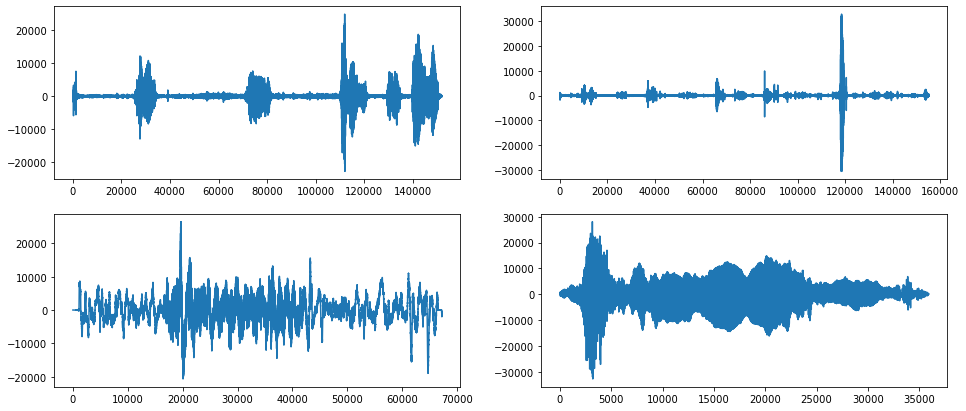

In [27]:
#각 사운드 파일의 배열 값 그래프
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16,7))
axs[0][0].plot(X_train[0])
axs[0][1].plot(X_train[1])
axs[1][0].plot(X_train[2])
axs[1][1].plot(X_train[3])
plt.show()